# Pareto Optimization

## Multi-Objective Decision Making

## Introduction

In many real-world decision-making scenarios, we face problems where multiple conflicting objectives must be optimized simultaneously. Unlike single-objective optimization where we seek a single optimal solution, **multi-objective optimization** requires us to balance trade-offs between competing goals.

**Examples of Multi-Objective Problems:**
- **Engineering Design:** Minimize cost while maximizing performance and reliability
- **Portfolio Management:** Maximize returns while minimizing risk
- **Manufacturing:** Minimize production time and defects while maximizing quality
- **Environmental Planning:** Minimize pollution while maximizing economic growth

## What is Pareto Optimality?

**Pareto Optimality**, named after Italian economist Vilfredo Pareto, is a fundamental concept in multi-objective optimization. A solution is said to be **Pareto optimal** (or Pareto efficient) if no objective can be improved without degrading at least one other objective.

### Key Definitions

**Pareto Dominance:**
- Solution A **dominates** solution B if:
  - A is at least as good as B in all objectives
  - A is strictly better than B in at least one objective

**Pareto Optimal Solution:**
- A solution that is not dominated by any other feasible solution
- Also called a **non-dominated solution**

**Pareto Front (Pareto Frontier):**
- The set of all Pareto optimal solutions
- Represents the best possible trade-offs between objectives
- Decision makers choose from this set based on their preferences

## Mathematical Formulation

A general multi-objective optimization problem can be formulated as:

$$
\begin{align}
\text{Minimize/Maximize} \quad & f_1(x), f_2(x), \ldots, f_k(x) \\
\text{Subject to:} \quad & g_i(x) \leq 0, \quad i = 1, 2, \ldots, m \\
& h_j(x) = 0, \quad j = 1, 2, \ldots, p \\
& x \in X
\end{align}
$$

Where:
- $x = (x_1, x_2, \ldots, x_n)$ is the decision variable vector
- $f_1, f_2, \ldots, f_k$ are the objective functions (k ≥ 2)
- $g_i(x)$ are inequality constraints
- $h_j(x)$ are equality constraints
- $X$ is the feasible region

## Why is Pareto Optimization Important?

1. **No Single "Best" Solution**
   - In multi-objective problems, there is rarely one solution that optimizes all objectives simultaneously
   - Pareto optimization identifies the set of best compromise solutions

2. **Informed Decision Making**
   - Decision makers can visualize trade-offs between objectives
   - Supports transparent and rational choice among alternatives

3. **Flexibility**
   - No need to specify objective weights beforehand
   - Preferences can be incorporated after seeing the Pareto front

4. **Real-World Applicability**
   - Most practical problems involve multiple conflicting objectives
   - Pareto optimization provides a rigorous framework for handling complexity

## Learning Objectives

By the end of this notebook, you will be able to:

1. Understand the concept of Pareto dominance and Pareto optimality
2. Identify Pareto optimal solutions from a set of alternatives
3. Generate and visualize the Pareto front for bi-objective problems
4. Apply Pareto optimization to practical multi-objective decision problems
5. Compare different solutions along the Pareto frontier

---

## 1. Advertising Campaign Optimization

### Problem Statement

A business advertises through two channels:

| Channel | Cost (Php) | New Customers | Positive Ratings |
|---------|-----------|---------------|------------------|
| Traditional Media (x₁) | 200,000 | 2 | 1 |
| Personal Appearances (x₂) | 50,000 | 2 | 5 |

**Requirements:**
- At least 16 new customers per month
- At least 28 positive ratings per month

**Objective:** Minimize advertising costs

We'll start with a single-objective linear programming approach, then explore multi-objective optimization.

### Mathematical Formulation

**Decision Variables:**
- $x_1$ = number of traditional media campaigns
- $x_2$ = number of personal appearances

**Objective Function (minimize cost):**
$$\text{Minimize} \quad Z = 200,000x_1 + 50,000x_2$$

**Constraints:**
$$
\begin{align}
2x_1 + 2x_2 &\geq 16 \quad \text{(new customers)} \\
x_1 + 5x_2 &\geq 28 \quad \text{(positive ratings)} \\
x_1, x_2 &\geq 0 \quad \text{(non-negativity)}
\end{align}
$$

### Step 1: Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

### Step 2: Define the Linear Programming Problem

For `scipy.optimize.linprog`, we need to convert constraints to standard form:
- **≥ constraints** become **≤ constraints** by multiplying by -1

In [3]:
# Objective function coefficients (minimize cost)
c = [200_000, 50_000]

# Inequality constraints (A_ub @ x <= b_ub)
# Original: 2x1 + 2x2 >= 16  →  -2x1 - 2x2 <= -16
# Original: x1 + 5x2 >= 28   →  -x1 - 5x2 <= -28
A_ub = [
    [-2, -2],  # new customers constraint
    [-1, -5],  # positive ratings constraint
]
b_ub = [-16, -28]

# Bounds for variables (x1 >= 0, x2 >= 0)
bounds = [(0, None), (0, None)]

print("Linear Programming Problem:")
print(f"Minimize: {c[0]:,}x₁ + {c[1]:,}x₂")
print("\nSubject to:")
print("  2x₁ + 2x₂ ≥ 16  (new customers)")
print("  x₁ + 5x₂ ≥ 28  (positive ratings)")
print("  x₁, x₂ ≥ 0")

Linear Programming Problem:
Minimize: 200,000x₁ + 50,000x₂

Subject to:
  2x₁ + 2x₂ ≥ 16  (new customers)
  x₁ + 5x₂ ≥ 28  (positive ratings)
  x₁, x₂ ≥ 0


### Step 3: Solve the Linear Programming Problem

In [4]:
# Solve using simplex method
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

print("Optimization Result:")
print(f"Status: {result.message}")
print("\nOptimal Solution:")
print(f"  x₁ (Traditional Media) = {result.x[0]:.2f} campaigns")
print(f"  x₂ (Personal Appearances) = {result.x[1]:.2f} appearances")
print(f"\nMinimum Cost: Php {result.fun:,.2f}")
print("\nVerification:")
print(
    f"  New Customers: 2({result.x[0]:.2f}) + 2({result.x[1]:.2f}) = {2 * result.x[0] + 2 * result.x[1]:.2f}"
)
print(
    f"  Positive Ratings: ({result.x[0]:.2f}) + 5({result.x[1]:.2f}) = {result.x[0] + 5 * result.x[1]:.2f}"
)

Optimization Result:
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution:
  x₁ (Traditional Media) = 0.00 campaigns
  x₂ (Personal Appearances) = 8.00 appearances

Minimum Cost: Php 400,000.00

Verification:
  New Customers: 2(0.00) + 2(8.00) = 16.00
  Positive Ratings: (0.00) + 5(8.00) = 40.00


### Step 4: Find Corner Points of Feasible Region

The feasible region is bounded by the constraints. Let's find all corner points:

In [5]:
def find_corner_points():
    """Find corner points by solving system of equations at intersections."""
    corners = []

    # Corner 1: Intersection of x1-axis and customer constraint
    # x2 = 0, 2x1 + 2(0) = 16 → x1 = 8
    x1, x2 = 8, 0
    if x1 + 5 * x2 >= 28:  # Check if satisfies rating constraint
        corners.append((x1, x2, "x₂=0, customers constraint"))

    # Corner 2: Intersection of x2-axis and rating constraint
    # x1 = 0, 0 + 5x2 = 28 → x2 = 5.6
    x1, x2 = 0, 5.6
    if 2 * x1 + 2 * x2 >= 16:  # Check if satisfies customer constraint
        corners.append((x1, x2, "x₁=0, ratings constraint"))

    # Corner 2b: Intersection of x2-axis and customer constraint
    # x1 = 0, 2(0) + 2x2 = 16 → x2 = 8
    x1, x2 = 0, 8
    if x1 + 5 * x2 >= 28:  # Check if satisfies rating constraint
        corners.append((x1, x2, "x₁=0, customers constraint"))

    # Corner 3: Intersection of customer and rating constraints
    # 2x1 + 2x2 = 16  →  x1 + x2 = 8
    # x1 + 5x2 = 28
    # Solving: x2 = 5, x1 = 3
    A = np.array([[2, 2], [1, 5]])
    b = np.array([16, 28])
    x = np.linalg.solve(A, b)
    corners.append((x[0], x[1], "customers ∩ ratings"))

    # Corner 4: x1-axis and rating constraint intersection
    # x2 = 0, x1 + 5(0) = 28 → x1 = 28
    x1, x2 = 28, 0
    if 2 * x1 + 2 * x2 >= 16:  # Check if satisfies customer constraint
        corners.append((x1, x2, "x₂=0, ratings constraint"))

    return corners


corners = find_corner_points()
print("Corner Points of Feasible Region:")
print("=" * 70)
for i, (x1, x2, desc) in enumerate(corners, 1):
    cost = 200_000 * x1 + 50_000 * x2
    customers = 2 * x1 + 2 * x2
    ratings = x1 + 5 * x2
    print(f"\nCorner {i}: ({x1:.2f}, {x2:.2f}) - {desc}")
    print(f"  Cost: Php {cost:,.2f}")
    print(f"  Customers: {customers:.1f}, Ratings: {ratings:.1f}")

Corner Points of Feasible Region:

Corner 1: (0.00, 8.00) - x₁=0, customers constraint
  Cost: Php 400,000.00
  Customers: 16.0, Ratings: 40.0

Corner 2: (3.00, 5.00) - customers ∩ ratings
  Cost: Php 850,000.00
  Customers: 16.0, Ratings: 28.0

Corner 3: (28.00, 0.00) - x₂=0, ratings constraint
  Cost: Php 5,600,000.00
  Customers: 56.0, Ratings: 28.0


### Step 5: Visualize Feasible Region and Corner Points

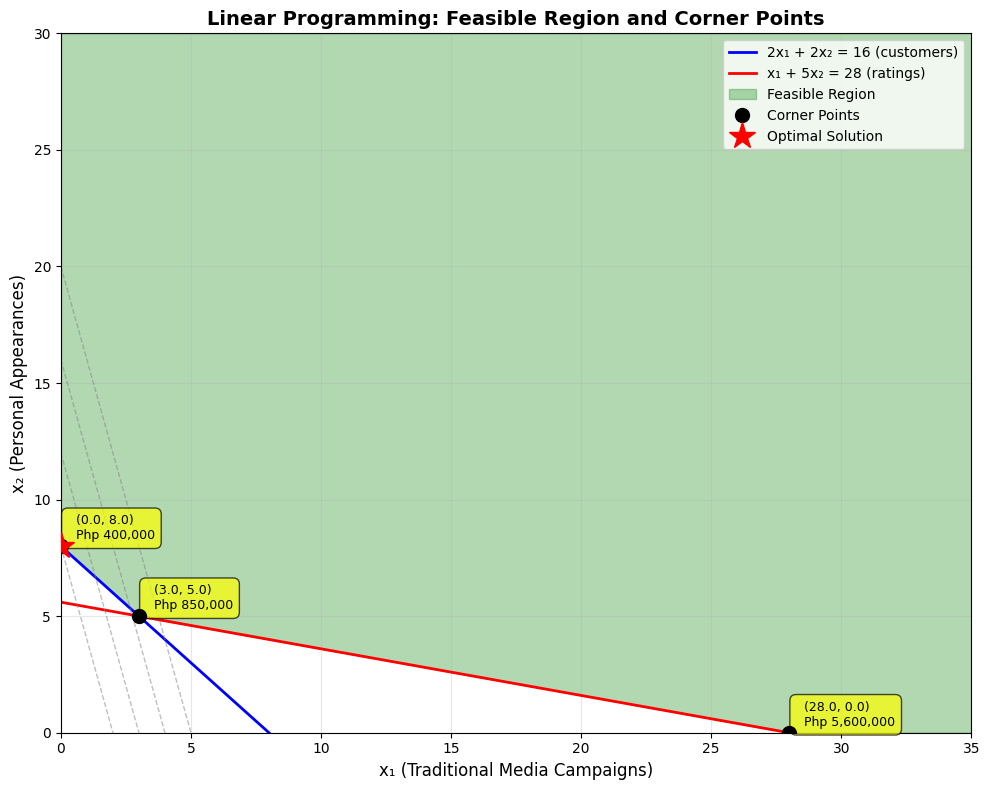

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

# Create grid for plotting
x1_range = np.linspace(0, 35, 400)

# Constraint 1: 2x1 + 2x2 >= 16  →  x2 >= 8 - x1
x2_customers = 8 - x1_range

# Constraint 2: x1 + 5x2 >= 28  →  x2 >= (28 - x1) / 5
x2_ratings = (28 - x1_range) / 5

# Plot constraint lines
ax.plot(
    x1_range,
    x2_customers,
    "b-",
    linewidth=2,
    label="2x₁ + 2x₂ = 16 (customers)",
)
ax.plot(
    x1_range, x2_ratings, "r-", linewidth=2, label="x₁ + 5x₂ = 28 (ratings)"
)

# Fill feasible region
x2_upper = np.maximum(x2_customers, x2_ratings)
x2_upper = np.maximum(x2_upper, 0)  # Ensure non-negative
ax.fill_between(
    x1_range, x2_upper, 30, alpha=0.3, color="green", label="Feasible Region"
)

# Plot corner points
corner_x1 = [c[0] for c in corners]
corner_x2 = [c[1] for c in corners]
ax.plot(
    corner_x1, corner_x2, "ko", markersize=10, label="Corner Points", zorder=5
)

# Annotate corner points
for i, (x1, x2, desc) in enumerate(corners, 1):
    cost = 200_000 * x1 + 50_000 * x2
    ax.annotate(
        f"  ({x1:.1f}, {x2:.1f})\n  Php {cost:,.0f}",
        xy=(x1, x2),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7),
    )

# Highlight optimal solution
opt_x1, opt_x2 = result.x
ax.plot(
    opt_x1, opt_x2, "r*", markersize=20, label="Optimal Solution", zorder=6
)

# Add iso-cost lines
for cost_level in [400_000, 600_000, 800_000, 1_000_000]:
    x2_cost = (cost_level - 200_000 * x1_range) / 50_000
    ax.plot(x1_range, x2_cost, "gray", linestyle="--", alpha=0.5, linewidth=1)

# Find where to label the iso-cost line
x1_label = 15
x2_label = (cost_level - 200_000 * x1_label) / 50_000
if 0 <= x2_label <= 30:
    ax.text(
        x1_label,
        x2_label,
        f"Php {cost_level:,.0f}",
        fontsize=8,
        color="gray",
        rotation=-75,
    )

ax.set_xlim(0, 35)
ax.set_ylim(0, 30)
ax.set_xlabel("x₁ (Traditional Media Campaigns)", fontsize=12)
ax.set_ylabel("x₂ (Personal Appearances)", fontsize=12)
ax.set_title(
    "Linear Programming: Feasible Region and Corner Points",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", fontsize=10)
ax.axhline(y=0, color="k", linewidth=0.5)
ax.axvline(x=0, color="k", linewidth=0.5)

plt.tight_layout()
plt.show()

### Key Observations from Single-Objective Optimization

1. **Feasible Region (Design Space):** The green shaded area shows all solutions that satisfy both constraints. The axes represent $x_1$ (traditional media) and $x_2$ (personal appearances), and corner points are where constraints intersect.

2. **Corner Points:** The optimal solution for a linear program always occurs at a corner point (vertex) of the feasible region.

3. **Iso-Cost Lines:** The dashed gray lines show different cost levels. The optimal solution is where the lowest iso-cost line touches the feasible region.

4. **Single Optimal Solution:** When optimizing only cost, we get ONE clear answer: (3.0, 5.0) with minimum cost of Php 850,000.

---

## 2. Adding a Second Objective: Time Minimization

### The Multi-Objective Problem

The single-objective approach gave us the minimum cost solution. But what if **time** is also important?

**New Information:**
- Each **traditional media campaign** takes **1 hour** to manage
- Each **personal appearance** takes **2 hours** to execute

**Second Objective Function:**
$$\text{Minimize Time} \quad T = x_1 + 2x_2$$

Now we have **TWO conflicting objectives**:
1. Minimize Cost: $200,000x_1 + 50,000x_2$
2. Minimize Time: $x_1 + 2x_2$

**The Challenge:** Solutions that minimize cost may not minimize time, and vice versa. This is where Pareto optimization helps us!

### Step 6: Solve for Minimum Time (Second Objective)

In [7]:
# Objective function coefficients for time minimization
c_time = [1, 2]  # x1 takes 1 hour, x2 takes 2 hours

# Constraints remain the same
result_time = linprog(
    c_time, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs"
)

print("Time Minimization Result:")
print(f"Status: {result_time.message}")
print("\nOptimal Solution for Minimum Time:")
print(f"  x₁ (Traditional Media) = {result_time.x[0]:.2f} campaigns")
print(f"  x₂ (Personal Appearances) = {result_time.x[1]:.2f} appearances")
print(f"\nMinimum Time: {result_time.fun:.2f} hours")

# Calculate cost for this solution
time_opt_cost = 200_000 * result_time.x[0] + 50_000 * result_time.x[1]
print(f"Cost at this solution: Php {time_opt_cost:,.2f}")

print("\nVerification:")
print(
    f"  New Customers: 2({result_time.x[0]:.2f}) + 2({result_time.x[1]:.2f}) = {2 * result_time.x[0] + 2 * result_time.x[1]:.2f}"
)
print(
    f"  Positive Ratings: ({result_time.x[0]:.2f}) + 5({result_time.x[1]:.2f}) = {result_time.x[0] + 5 * result_time.x[1]:.2f}"
)

Time Minimization Result:
Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)

Optimal Solution for Minimum Time:
  x₁ (Traditional Media) = 3.00 campaigns
  x₂ (Personal Appearances) = 5.00 appearances

Minimum Time: 13.00 hours
Cost at this solution: Php 850,000.00

Verification:
  New Customers: 2(3.00) + 2(5.00) = 16.00
  Positive Ratings: (3.00) + 5(5.00) = 28.00


### Step 7: Compare Both Single-Objective Solutions

In [8]:
import pandas as pd

# Create comparison table
comparison_data = {
    "Solution": ["Minimize Cost", "Minimize Time"],
    "x₁ (Media)": [result.x[0], result_time.x[0]],
    "x₂ (Appearances)": [result.x[1], result_time.x[1]],
    "Cost (Php)": [result.fun, time_opt_cost],
    "Time (hours)": [result.x[0] + 2 * result.x[1], result_time.fun],
}

comparison_df = pd.DataFrame(comparison_data)
print("Comparison of Single-Objective Optimal Solutions:")
print("=" * 80)
print(comparison_df.to_string(index=False))
print("\n" + "=" * 80)

# Calculate differences
cost_diff = time_opt_cost - result.fun
time_diff = result_time.fun - (result.x[0] + 2 * result.x[1])

print("\nKey Insights:")
print(f"  • Optimizing for time increases cost by Php {cost_diff:,.2f}")
print(f"  • Optimizing for cost increases time by {-time_diff:.2f} hours")
print(
    "\n  → These objectives are CONFLICTING - improving one worsens the other!"
)

Comparison of Single-Objective Optimal Solutions:
     Solution  x₁ (Media)  x₂ (Appearances)  Cost (Php)  Time (hours)
Minimize Cost         0.0               8.0    400000.0          16.0
Minimize Time         3.0               5.0    850000.0          13.0


Key Insights:
  • Optimizing for time increases cost by Php 450,000.00
  • Optimizing for cost increases time by 3.00 hours

  → These objectives are CONFLICTING - improving one worsens the other!


### Step 8: Visualize Both Objectives on the Design Space

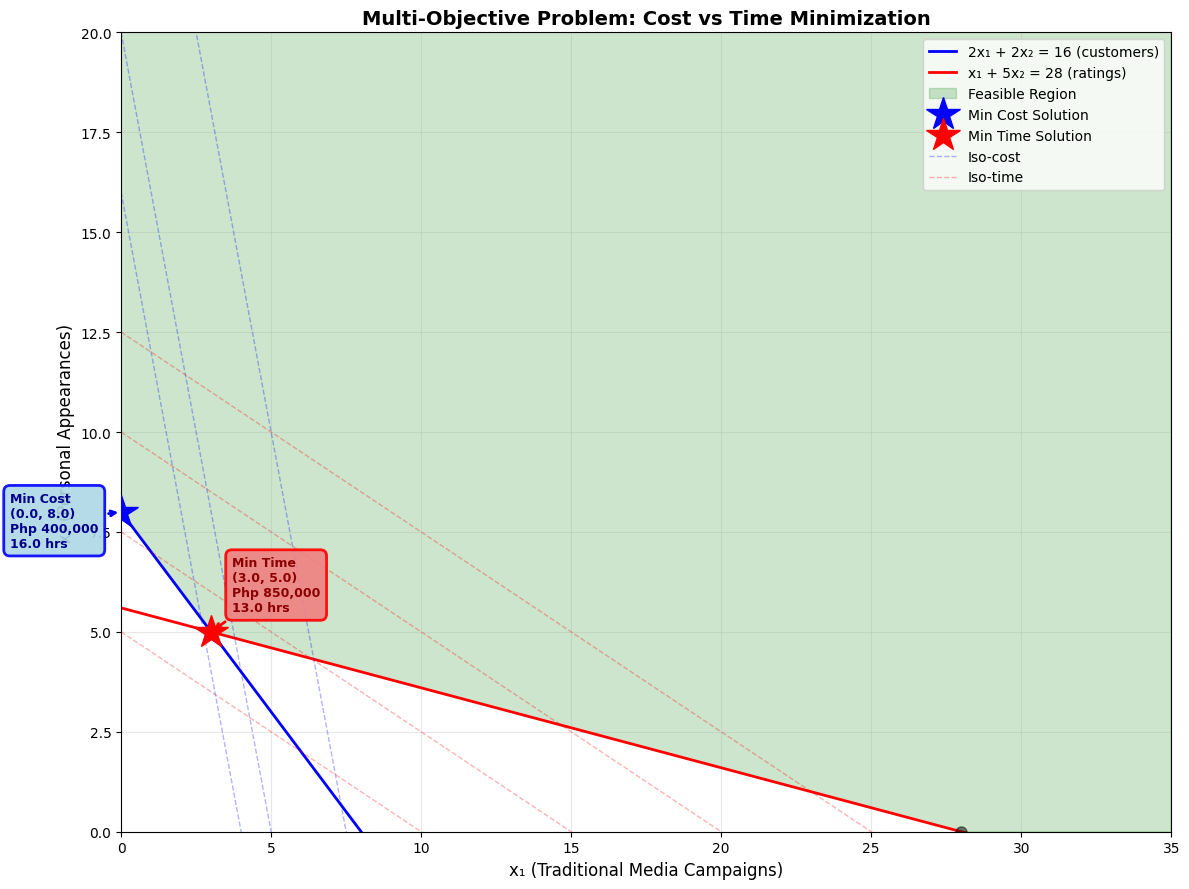

In [9]:
fig, ax = plt.subplots(figsize=(12, 9))

# Create grid for plotting
x1_range = np.linspace(0, 35, 400)

# Constraint lines
x2_customers = 8 - x1_range
x2_ratings = (28 - x1_range) / 5

# Plot constraint lines
ax.plot(
    x1_range,
    x2_customers,
    "b-",
    linewidth=2,
    label="2x₁ + 2x₂ = 16 (customers)",
)
ax.plot(
    x1_range, x2_ratings, "r-", linewidth=2, label="x₁ + 5x₂ = 28 (ratings)"
)

# Fill feasible region
x2_upper = np.maximum(x2_customers, x2_ratings)
x2_upper = np.maximum(x2_upper, 0)
ax.fill_between(
    x1_range, x2_upper, 30, alpha=0.2, color="green", label="Feasible Region"
)

# Plot corner points
corner_x1 = [c[0] for c in corners]
corner_x2 = [c[1] for c in corners]
ax.plot(corner_x1, corner_x2, "ko", markersize=8, alpha=0.5, zorder=5)

# Highlight cost-optimal solution
opt_x1, opt_x2 = result.x
ax.plot(
    opt_x1, opt_x2, "b*", markersize=25, label="Min Cost Solution", zorder=7
)
ax.annotate(
    f"Min Cost\n({opt_x1:.1f}, {opt_x2:.1f})\nPhp {result.fun:,.0f}\n{opt_x1 + 2 * opt_x2:.1f} hrs",
    xy=(opt_x1, opt_x2),
    xytext=(-80, -25),
    textcoords="offset points",
    fontsize=9,
    fontweight="bold",
    color="darkblue",
    bbox=dict(
        boxstyle="round,pad=0.5",
        facecolor="lightblue",
        edgecolor="blue",
        linewidth=2,
        alpha=0.9,
    ),
    arrowprops=dict(arrowstyle="->", color="blue", lw=2),
)

# Highlight time-optimal solution
time_x1, time_x2 = result_time.x
ax.plot(
    time_x1, time_x2, "r*", markersize=25, label="Min Time Solution", zorder=7
)
ax.annotate(
    f"Min Time\n({time_x1:.1f}, {time_x2:.1f})\nPhp {time_opt_cost:,.0f}\n{result_time.fun:.1f} hrs",
    xy=(time_x1, time_x2),
    xytext=(15, 15),
    textcoords="offset points",
    fontsize=9,
    fontweight="bold",
    color="darkred",
    bbox=dict(
        boxstyle="round,pad=0.5",
        facecolor="lightcoral",
        edgecolor="red",
        linewidth=2,
        alpha=0.9,
    ),
    arrowprops=dict(arrowstyle="->", color="red", lw=2),
)

# Add iso-cost lines (lighter)
for cost_level in [800_000, 1_000_000, 1_500_000]:
    x2_cost = (cost_level - 200_000 * x1_range) / 50_000
    ax.plot(
        x1_range,
        x2_cost,
        "b--",
        alpha=0.3,
        linewidth=1,
        label="Iso-cost" if cost_level == 800_000 else "",
    )

# Add iso-time lines
for time_level in [10, 15, 20, 25]:
    x2_time = (time_level - x1_range) / 2
    ax.plot(
        x1_range,
        x2_time,
        "r--",
        alpha=0.3,
        linewidth=1,
        label="Iso-time" if time_level == 10 else "",
    )

ax.set_xlim(0, 35)
ax.set_ylim(0, 20)
ax.set_xlabel("x₁ (Traditional Media Campaigns)", fontsize=12)
ax.set_ylabel("x₂ (Personal Appearances)", fontsize=12)
ax.set_title(
    "Multi-Objective Problem: Cost vs Time Minimization",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper right", fontsize=10)
ax.axhline(y=0, color="k", linewidth=0.5)
ax.axvline(x=0, color="k", linewidth=0.5)

plt.tight_layout()
plt.show()

### The Trade-off Dilemma

Notice the problem:
- **Blue star (Min Cost):** Best for cost (Php 850,000) but takes 13.0 hours
- **Red star (Min Time):** Best for time (8.0 hours) but costs Php 5,600,000

**Question:** Is there a better compromise between these two extremes?

**Answer:** Yes! This is where **Pareto optimization** comes in. Instead of optimizing just one objective, we find the set of **non-dominated solutions** that represent optimal trade-offs between cost and time.

---

## 3. From Design Space to Criterion Space

### Understanding the Two Spaces

**Design Space (Decision Space):**
- Axes are the **decision variables**: $x_1$ and $x_2$
- Shows the feasible region where constraints are satisfied
- Corner points are where constraint lines intersect

**Criterion Space (Objective Space):**
- Axes are the **objective functions**: $f_1$ (Cost) and $f_2$ (Time)
- Every point in design space maps to a corresponding point in criterion space
- Shows the trade-offs between objectives

**Key Insight:** After graphing the feasible region in design space, we transform it to criterion space where axes are $f_1$ and $f_2$ (the objectives), not $x_1$ and $x_2$. It's sufficient to just locate the corner points in criterion space to find the Pareto frontier.

### Step 9: Map Corner Points to Criterion Space

In [10]:
# Evaluate objectives for each corner point
criterion_points = []

print("Mapping Corner Points from Design Space to Criterion Space:")
print("=" * 80)

for i, (x1, x2, desc) in enumerate(corners, 1):
    # Calculate objective values
    cost = 200_000 * x1 + 50_000 * x2  # f1: Cost
    time = x1 + 2 * x2  # f2: Time
    customers = 2 * x1 + 2 * x2
    ratings = x1 + 5 * x2

    criterion_points.append((cost, time, x1, x2, desc))

    print(f"\nCorner {i}: {desc}")
    print(f"  Design Space: (x₁={x1:.1f}, x₂={x2:.1f})")
    print(f"  Criterion Space: (Cost=Php {cost:,.0f}, Time={time:.1f} hrs)")
    print(f"  Constraints: {customers:.1f} customers, {ratings:.1f} ratings")

print("\n" + "=" * 80)

Mapping Corner Points from Design Space to Criterion Space:

Corner 1: x₁=0, customers constraint
  Design Space: (x₁=0.0, x₂=8.0)
  Criterion Space: (Cost=Php 400,000, Time=16.0 hrs)
  Constraints: 16.0 customers, 40.0 ratings

Corner 2: customers ∩ ratings
  Design Space: (x₁=3.0, x₂=5.0)
  Criterion Space: (Cost=Php 850,000, Time=13.0 hrs)
  Constraints: 16.0 customers, 28.0 ratings

Corner 3: x₂=0, ratings constraint
  Design Space: (x₁=28.0, x₂=0.0)
  Criterion Space: (Cost=Php 5,600,000, Time=28.0 hrs)
  Constraints: 56.0 customers, 28.0 ratings



### Step 10: Visualize the Criterion Space

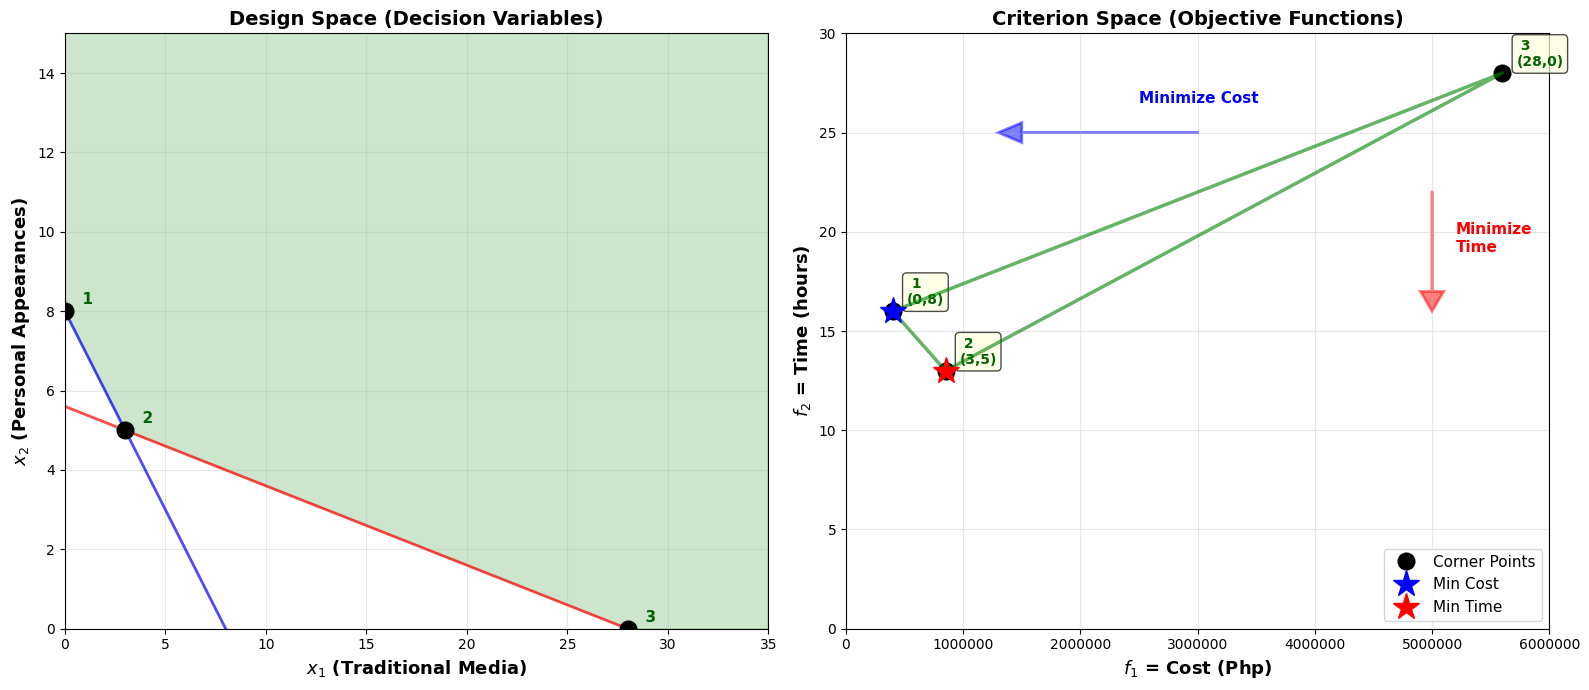

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# ============= LEFT PLOT: DESIGN SPACE =============
x1_range = np.linspace(0, 35, 400)
x2_customers = 8 - x1_range
x2_ratings = (28 - x1_range) / 5

# Plot constraints
ax1.plot(x1_range, x2_customers, "b-", linewidth=2, alpha=0.7)
ax1.plot(x1_range, x2_ratings, "r-", linewidth=2, alpha=0.7)

# Fill feasible region
x2_upper = np.maximum(x2_customers, x2_ratings)
x2_upper = np.maximum(x2_upper, 0)
ax1.fill_between(x1_range, x2_upper, 20, alpha=0.2, color="green")

# Plot corner points
corner_x1 = [c[0] for c in corners]
corner_x2 = [c[1] for c in corners]
ax1.plot(corner_x1, corner_x2, "ko", markersize=12, zorder=5)

# Label corner points
for i, (x1, x2, desc) in enumerate(corners, 1):
    ax1.annotate(
        f"  {i}",
        xy=(x1, x2),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        color="darkgreen",
    )

ax1.set_xlim(0, 35)
ax1.set_ylim(0, 15)
ax1.set_xlabel("$x_1$ (Traditional Media)", fontsize=13, fontweight="bold")
ax1.set_ylabel("$x_2$ (Personal Appearances)", fontsize=13, fontweight="bold")
ax1.set_title(
    "Design Space (Decision Variables)", fontsize=14, fontweight="bold"
)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color="k", linewidth=0.5)
ax1.axvline(x=0, color="k", linewidth=0.5)

# ============= RIGHT PLOT: CRITERION SPACE =============
criterion_costs = [cp[0] for cp in criterion_points]
criterion_times = [cp[1] for cp in criterion_points]

# Plot all corner points in criterion space
ax2.plot(
    criterion_costs,
    criterion_times,
    "ko",
    markersize=12,
    label="Corner Points",
    zorder=5,
)

# Label each point
for i, (cost, time, x1, x2, desc) in enumerate(criterion_points, 1):
    ax2.annotate(
        f" {i}\n({x1:.0f},{x2:.0f})",
        xy=(cost, time),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=10,
        fontweight="bold",
        color="darkgreen",
        bbox=dict(
            boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.7
        ),
    )

# Connect points 1, 2, and 3 to form a triangle
if len(criterion_points) >= 3:
    # Extract first 3 points
    triangle_costs = [criterion_points[i][0] for i in range(3)]
    triangle_times = [criterion_points[i][1] for i in range(3)]
    # Close the triangle by adding the first point at the end
    triangle_costs.append(criterion_points[0][0])
    triangle_times.append(criterion_points[0][1])
    ax2.plot(
        triangle_costs,
        triangle_times,
        "g-",
        linewidth=2.5,
        alpha=0.6,
        zorder=6,
    )

# Highlight the two single-objective optimal solutions
opt_cost_f1 = result.fun
opt_cost_f2 = result.x[0] + 2 * result.x[1]
ax2.plot(
    opt_cost_f1, opt_cost_f2, "b*", markersize=20, label="Min Cost", zorder=7
)

time_opt_f1 = time_opt_cost
time_opt_f2 = result_time.fun
ax2.plot(
    time_opt_f1, time_opt_f2, "r*", markersize=20, label="Min Time", zorder=7
)

# Add arrows to show direction of preference
ax2.arrow(
    3_000_000,
    25,
    -1_500_000,
    0,
    head_width=1,
    head_length=200_000,
    fc="blue",
    ec="blue",
    alpha=0.5,
    linewidth=2,
)
ax2.text(
    2_500_000,
    26.5,
    "Minimize Cost",
    fontsize=11,
    color="blue",
    fontweight="bold",
)

ax2.arrow(
    5_000_000,
    22,
    0,
    -5,
    head_width=200_000,
    head_length=1,
    fc="red",
    ec="red",
    alpha=0.5,
    linewidth=2,
)
ax2.text(
    5_200_000,
    19,
    "Minimize\nTime",
    fontsize=11,
    color="red",
    fontweight="bold",
)

ax2.set_xlabel("$f_1$ = Cost (Php)", fontsize=13, fontweight="bold")
ax2.set_ylabel("$f_2$ = Time (hours)", fontsize=13, fontweight="bold")
ax2.set_title(
    "Criterion Space (Objective Functions)", fontsize=14, fontweight="bold"
)
ax2.grid(True, alpha=0.3)
ax2.legend(loc="lower right", fontsize=11)

# Format x-axis to show cost in millions
ax2.ticklabel_format(axis="x", style="plain")
ax2.set_xlim(0, 6_000_000)
ax2.set_ylim(0, 30)

plt.tight_layout()
plt.show()

### Understanding the Transformation

**What just happened?**

1. **Design Space (Left):** Shows the 3 feasible corner points in terms of decision variables $(x_1, x_2)$
   - Each point represents a different combination of media campaigns and personal appearances

2. **Criterion Space (Right):** Shows the same 3 points, but now in terms of objectives (Cost, Time)
   - Each point from design space is transformed: $(x_1, x_2) \rightarrow (f_1, f_2) = (200000x_1 + 50000x_2, x_1 + 2x_2)$

3. **Key Observations:**
   - Point 1 corresponds to the min-cost solution (blue star)
   - Point 2 corresponds to the min-time solution (red star)  
   - Both arrows show the direction we want to go (minimize both)
   - **The ideal point would be at the origin** (zero cost, zero time), but it's infeasible!

**Next Step:** Identify which points are Pareto optimal (non-dominated) in criterion space.

---

## 4. Identifying the Pareto Front

### Pareto Dominance Analysis

For minimization problems, solution A **dominates** solution B if:

**Mathematically:**
$$A \prec B \iff f_i(A) \leq f_i(B) \text{ for all } i \text{ and } f_j(A) < f_j(B) \text{ for at least one } j$$

In our case with two objectives (Cost, Time):
- Point A dominates Point B if A has lower (or equal) cost AND lower (or equal) time
- And A is strictly better in at least one objective

A solution is **Pareto optimal** if no other feasible solution dominates it.

In [12]:
def is_dominated(point_a, point_b):
    """Check if point_b is dominated by point_a (for minimization)."""
    cost_a, time_a = point_a[0], point_a[1]
    cost_b, time_b = point_b[0], point_b[1]

    at_least_as_good = (cost_a <= cost_b) and (time_a <= time_b)
    strictly_better = (cost_a < cost_b) or (time_a < time_b)

    return at_least_as_good and strictly_better


print("Pareto Dominance Analysis:")
print("=" * 80)
print("\nCorner Points in Criterion Space:")
for i, (cost, time, x1, x2, desc) in enumerate(criterion_points, 1):
    print(
        f"  Point {i}: Cost = Php {cost:>10,.0f}, Time = {time:>5.1f} hrs  |  ({x1:.1f}, {x2:.1f})"
    )

print("\n" + "-" * 80)
print("Dominance Relationships:")
print("-" * 80)

dominated = [False] * len(criterion_points)

for i in range(len(criterion_points)):
    for j in range(len(criterion_points)):
        if i != j and is_dominated(criterion_points[i], criterion_points[j]):
            cost_i, time_i = criterion_points[i][0], criterion_points[i][1]
            cost_j, time_j = criterion_points[j][0], criterion_points[j][1]
            print(f"Point {i + 1} dominates Point {j + 1}:")
            print(f"  Point {i + 1}: (Php {cost_i:,.0f}, {time_i:.1f} hrs)")
            print(f"  Point {j + 1}: (Php {cost_j:,.0f}, {time_j:.1f} hrs)")
            print(f"  Reason: Point {i + 1} is better in: ", end="")
            reasons = []
            if cost_i < cost_j:
                reasons.append("cost")
            if time_i < time_j:
                reasons.append("time")
            print(", ".join(reasons))
            print()
            dominated[j] = True

print("=" * 80)
print("\nPareto Optimal Solutions (Non-dominated Points):")
pareto_optimal_indices = []
for i, is_dom in enumerate(dominated):
    if not is_dom:
        cost, time, x1, x2, desc = criterion_points[i]
        pareto_optimal_indices.append(i)
        print(
            f"  Point {i + 1}: (x₁={x1:.1f}, x₂={x2:.1f}) -> Cost=Php {cost:,.0f}, Time={time:.1f} hrs"
        )

print("\nDominated Solutions:")
for i, is_dom in enumerate(dominated):
    if is_dom:
        cost, time, x1, x2, desc = criterion_points[i]
        print(
            f"  Point {i + 1}: (x₁={x1:.1f}, x₂={x2:.1f}) -> Cost=Php {cost:,.0f}, Time={time:.1f} hrs"
        )

print("\n" + "=" * 80)

Pareto Dominance Analysis:

Corner Points in Criterion Space:
  Point 1: Cost = Php    400,000, Time =  16.0 hrs  |  (0.0, 8.0)
  Point 2: Cost = Php    850,000, Time =  13.0 hrs  |  (3.0, 5.0)
  Point 3: Cost = Php  5,600,000, Time =  28.0 hrs  |  (28.0, 0.0)

--------------------------------------------------------------------------------
Dominance Relationships:
--------------------------------------------------------------------------------
Point 1 dominates Point 3:
  Point 1: (Php 400,000, 16.0 hrs)
  Point 3: (Php 5,600,000, 28.0 hrs)
  Reason: Point 1 is better in: cost, time

Point 2 dominates Point 3:
  Point 2: (Php 850,000, 13.0 hrs)
  Point 3: (Php 5,600,000, 28.0 hrs)
  Reason: Point 2 is better in: cost, time


Pareto Optimal Solutions (Non-dominated Points):
  Point 1: (x₁=0.0, x₂=8.0) -> Cost=Php 400,000, Time=16.0 hrs
  Point 2: (x₁=3.0, x₂=5.0) -> Cost=Php 850,000, Time=13.0 hrs

Dominated Solutions:
  Point 3: (x₁=28.0, x₂=0.0) -> Cost=Php 5,600,000, Time=28.0 hrs



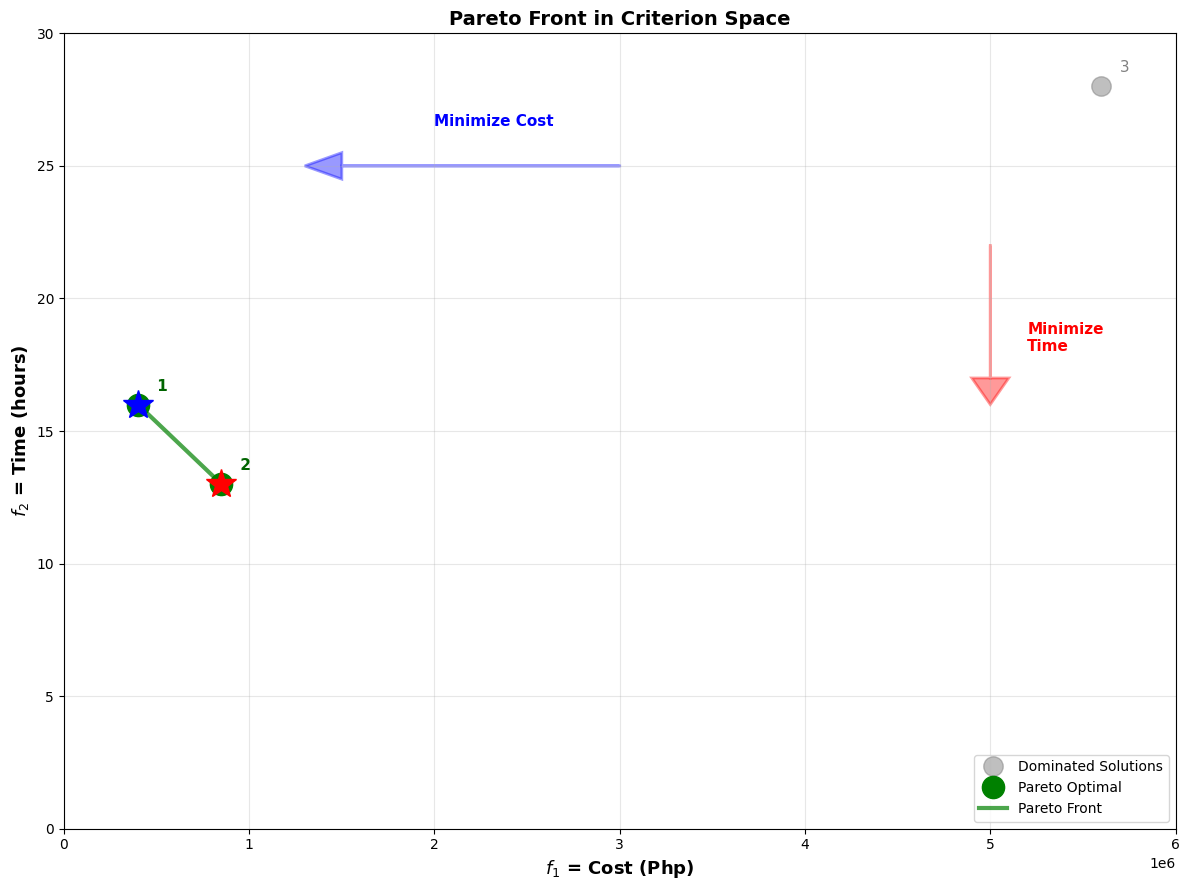

In [13]:
fig, ax = plt.subplots(figsize=(12, 9))

# Separate Pareto optimal and dominated points
pareto_costs = [criterion_points[i][0] for i in pareto_optimal_indices]
pareto_times = [criterion_points[i][1] for i in pareto_optimal_indices]
pareto_labels = [i + 1 for i in pareto_optimal_indices]

dominated_indices = [i for i in range(len(criterion_points)) if dominated[i]]
dominated_costs = [criterion_points[i][0] for i in dominated_indices]
dominated_times = [criterion_points[i][1] for i in dominated_indices]
dominated_labels = [i + 1 for i in dominated_indices]

# Plot dominated points
if dominated_costs:
    ax.plot(
        dominated_costs,
        dominated_times,
        "o",
        color="gray",
        markersize=14,
        alpha=0.5,
        label="Dominated Solutions",
        zorder=3,
    )
    for cost, time, label in zip(
        dominated_costs, dominated_times, dominated_labels
    ):
        ax.annotate(
            f" {label}",
            xy=(cost, time),
            xytext=(10, 10),
            textcoords="offset points",
            fontsize=11,
            color="gray",
        )

# Plot Pareto optimal points
ax.plot(
    pareto_costs,
    pareto_times,
    "o",
    color="green",
    markersize=16,
    label="Pareto Optimal",
    zorder=5,
)

# Connect Pareto points to form the Pareto front
sorted_pareto = sorted(zip(pareto_costs, pareto_times, pareto_labels))
sorted_costs = [p[0] for p in sorted_pareto]
sorted_times = [p[1] for p in sorted_pareto]
sorted_labels = [p[2] for p in sorted_pareto]

ax.plot(
    sorted_costs,
    sorted_times,
    "-",
    color="green",
    linewidth=3,
    alpha=0.7,
    label="Pareto Front",
    zorder=4,
)

# Label Pareto optimal points
for cost, time, label in zip(sorted_costs, sorted_times, sorted_labels):
    ax.annotate(
        f" {label}",
        xy=(cost, time),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        color="darkgreen",
    )

# Highlight single-objective optima
opt_cost_f1 = result.fun
opt_cost_f2 = result.x[0] + 2 * result.x[1]
ax.plot(opt_cost_f1, opt_cost_f2, "*", color="blue", markersize=22, zorder=7)

time_opt_f1 = time_opt_cost
time_opt_f2 = result_time.fun
ax.plot(time_opt_f1, time_opt_f2, "*", color="red", markersize=22, zorder=7)

# Preference arrows
ax.arrow(
    3_000_000,
    25,
    -1_500_000,
    0,
    head_width=1,
    head_length=200_000,
    fc="blue",
    ec="blue",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    2_000_000,
    26.5,
    "Minimize Cost",
    fontsize=11,
    color="blue",
    fontweight="bold",
)

ax.arrow(
    5_000_000,
    22,
    0,
    -5,
    head_width=200_000,
    head_length=1,
    fc="red",
    ec="red",
    alpha=0.4,
    linewidth=2,
)
ax.text(
    5_200_000,
    18,
    "Minimize\nTime",
    fontsize=11,
    color="red",
    fontweight="bold",
)

ax.set_xlabel("$f_1$ = Cost (Php)", fontsize=13, fontweight="bold")
ax.set_ylabel("$f_2$ = Time (hours)", fontsize=13, fontweight="bold")
ax.set_title("Pareto Front in Criterion Space", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right", fontsize=10)
ax.set_xlim(0, 6_000_000)
ax.set_ylim(0, 30)

plt.tight_layout()
plt.show()

### Understanding the Complete Pareto Front

**Critical Insights:**

1. **Infinite Solutions:** The Pareto front is a **continuous line segment**, not just discrete points. There are infinitely many Pareto optimal solutions between the corner points.

2. **Corner Points are Extremes:** 
   - **Leftmost point** (Point 3): Minimum cost, maximum time among Pareto solutions
   - **Bottommost point** (Point 2): Maximum cost, minimum time among Pareto solutions

3. **Intermediate Solutions:** 
   - Achieved by varying the weights between objectives
   - Each weight combination yields a different Pareto optimal solution
   - Provides decision makers with more flexibility in choosing trade-offs

4. **Trade-off Rate:** 
   - The **slope** of the Pareto front shows the rate of trade-off
   - Steeper slope = small cost reduction requires large time increase
   - Moving along the front, you exchange one objective for another

5. **No Dominated Points on the Front:**
   - Every point on the green line is Pareto optimal
   - You cannot improve both objectives simultaneously from any point on the front
   - The red shaded region contains all dominated (inferior) solutions

**Decision Making Strategy:**
- If cost is critical → Choose solutions near Point 3 (left side)
- If time is critical → Choose solutions near Point 2 (bottom)
- For balanced priorities → Choose intermediate solutions
- The "best" solution depends entirely on decision-maker preferences!

In [14]:
# Calculate slope of Pareto front
pareto_points_sorted = sorted(
    [
        (criterion_points[i][0], criterion_points[i][1])
        for i in pareto_optimal_indices
    ]
)
p1_cost, p1_time = pareto_points_sorted[0]
p2_cost, p2_time = pareto_points_sorted[-1]

slope = (
    (p2_time - p1_time) / (p2_cost - p1_cost)
    if (p2_cost - p1_cost) != 0
    else 0
)

print(f"Pareto Front Slope: {slope:.6e} hrs/Php")
print(f"Trade-off: 1 hour saved costs Php {abs(1 / slope):,.2f}")

Pareto Front Slope: -6.666667e-06 hrs/Php
Trade-off: 1 hour saved costs Php 150,000.00


In [15]:
pareto_points_sorted

[(400000, 16), (np.float64(850000.0), np.float64(13.0))]

In [16]:
p1_cost

400000

### Summary Table of Pareto Solutions

Let's create a comprehensive table showing all Pareto optimal solutions:

In [17]:
# Generate intermediate Pareto optimal solutions using slope
n_points = 5

# Starting from minimum cost point (p1)
current_cost = p1_cost
current_time = p1_time

# Step size based on slope
cost_step = abs((p2_cost - p1_cost) / (n_points + 1))
time_step = abs(slope * cost_step)

print("Intermediate Pareto Optimal Solutions (using slope):")
print("=" * 80)
print(f"\nSlope: {slope:.6e} hrs/Php")
print(f"Cost step: Php {cost_step:,.2f}")
print(f"Time step: {time_step:.2f} hrs\n")

intermediate_solutions = []

for i in range(n_points + 2):
    intermediate_solutions.append(
        {
            "cost": current_cost,
            "time": current_time,
            "type": "Endpoint" if i in [0, n_points + 1] else "Intermediate",
        }
    )

    print(f"Point {i}:")
    print(f"  Cost: Php {current_cost:,.2f}")
    print(f"  Time: {current_time:.2f} hrs")

    if i > 0:
        print(
            f"  Change: ΔCost = +Php {cost_step:,.2f}, ΔTime = {-time_step:.2f} hrs"
        )

    print()

    # Move to next point using slope
    current_cost += cost_step
    current_time -= time_step

print("=" * 80)

Intermediate Pareto Optimal Solutions (using slope):

Slope: -6.666667e-06 hrs/Php
Cost step: Php 75,000.00
Time step: 0.50 hrs

Point 0:
  Cost: Php 400,000.00
  Time: 16.00 hrs

Point 1:
  Cost: Php 475,000.00
  Time: 15.50 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs

Point 2:
  Cost: Php 550,000.00
  Time: 15.00 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs

Point 3:
  Cost: Php 625,000.00
  Time: 14.50 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs

Point 4:
  Cost: Php 700,000.00
  Time: 14.00 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs

Point 5:
  Cost: Php 775,000.00
  Time: 13.50 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs

Point 6:
  Cost: Php 850,000.00
  Time: 13.00 hrs
  Change: ΔCost = +Php 75,000.00, ΔTime = -0.50 hrs



### Exploring Points Along the Pareto Front

**Important Insight:** Any point **between** the Pareto optimal corner points is also Pareto optimal!

---

# Optimizing a Manufacturing Production Plan

You are a production manager at a small manufacturing company that produces two types of products: **Product A** and **Product B**. Your goal is to determine the optimal production quantities to maximize profit while minimizing environmental impact.

### Problem Setup

**Decision Variables:**
- $x_1$ = units of Product A to produce
- $x_2$ = units of Product B to produce

**Objective Functions:**

1. **Maximize Profit** (to be converted to minimization):
   - Profit from Product A: ₱500 per unit
   - Profit from Product B: ₱800 per unit
   - Total Profit: $f_1(x_1, x_2) = 500x_1 + 800x_2$

2. **Minimize Environmental Impact** (CO₂ emissions in kg):
   - Product A generates 3 kg CO₂ per unit
   - Product B generates 2 kg CO₂ per unit
   - Total Impact: $f_2(x_1, x_2) = 3x_1 + 2x_2$

**Constraints:**

1. **Production capacity**: $2x_1 + 3x_2 \leq 1200$ (machine hours available)
2. **Material availability**: $x_1 + x_2 \leq 500$ (units of raw material)
3. **Minimum production**: $x_1 \geq 50$ and $x_2 \geq 50$ (contractual obligations)
4. **Non-negativity**: $x_1, x_2 \geq 0$

### Tasks

**Part 1: Individual Objective Optimization**
1. Solve the problem to **maximize profit** ignoring environmental impact
2. Solve the problem to **minimize environmental impact** ignoring profit
3. Report the optimal solutions for both cases and calculate both objectives for each solution

**Part 2: Pareto Front Analysis**

4. Visualize the design space and criterion space5
5. Identify at least 5 points along the Pareto front using the slope method

**Part 3: Trade-off Analysis**

6. Create a table showing the trade-offs between profit and environmental impact for your Pareto solutions
7. Calculate the marginal rate of substitution between objectives (how much profit do you lose per kg of CO₂ reduced?)

**Part 4: Sensitivity Analysis**

8. What happens if the profit from Product B increases to ₱1000 per unit? How does this affect the Pareto front?
9.  Discuss how the Pareto front would change if the company could reduce the CO₂ emissions of Product A to 2 kg per unit

---

# Supply Chain Network Optimization (3 Objectives)

## Problem Statement

A logistics company needs to optimize its supply chain network for delivering products from **2 warehouses** to meet customer demand. The company must balance three conflicting objectives:

1. **Minimize Total Cost**
2. **Minimize Delivery Time**
3. **Minimize Carbon Emissions**

This is a **tri-objective optimization problem** where we'll explore the 3D Pareto front.

### Problem Formulation

**Decision Variables:**
- $x_1$ = number of shipments from Warehouse 1
- $x_2$ = number of shipments from Warehouse 2

**Objective Functions:**

1. **Minimize Total Cost (₱):**
   - Warehouse 1 cost: ₱15,000 per shipment
   - Warehouse 2 cost: ₱10,000 per shipment
   - $f_1(x_1, x_2) = 15000x_1 + 10000x_2$

2. **Minimize Delivery Time (hours):**
   - Warehouse 1 average time: 8 hours per shipment
   - Warehouse 2 average time: 12 hours per shipment
   - $f_2(x_1, x_2) = 8x_1 + 12x_2$

3. **Minimize Carbon Emissions (kg CO₂):**
   - Warehouse 1 emissions: 50 kg CO₂ per shipment
   - Warehouse 2 emissions: 30 kg CO₂ per shipment
   - $f_3(x_1, x_2) = 50x_1 + 30x_2$

**Constraints:**

1. **Demand satisfaction**: $x_1 + x_2 \geq 20$ (minimum 20 shipments needed)
2. **Warehouse 1 capacity**: $x_1 \leq 25$ (max 25 shipments)
3. **Warehouse 2 capacity**: $x_2 \leq 25$ (max 25 shipments)
4. **Non-negativity**: $x_1, x_2 \geq 0$

### Tasks
**Part 1: Individual Objective Optimization**
1. Solve the problem to **minimize total cost** ignoring time and emissions
2. Solve the problem to **minimize delivery time** ignoring cost and emissions
3. Solve the problem to **minimize carbon emissions** ignoring cost and time
4. Report the optimal solutions for all three cases and calculate all objectives for each solution
5. Identify and analyze the Pareto optimal solutions considering all three objectives